## Evaluating Hypothesisi tests

Hypothesis: $H_0:\theta\in\Theta_0$ vs. $H_1: \theta\in\Theta^c_0$

Test procedure: Reject $H_0$ if $\mathbf{X}\in R$

- Can make two types of mistakes
    - Reject $H_0:\theta\in\Theta_0$ when in fact $\theta\in\Theta_0$ (Type I)
    - Don't reject $H_0:\theta\in\Theta_0$ when in fact $\theta\notin\Theta_0$ (Type II)
- Want the *probability* of mistakes to be small

    $P_\theta(\mathbf{X}\in R)=$ probability of rejecting $H_0$, which depends on the unknown $\theta$
- Recall LRT: Reject $H_0$ if $\lambda(\mathbf{X})\leq c$
    - $c$ determines the probability of these mistakes


## The challenge of finding a good test procedure

Choose $R$ (i.e. $c$ in the LRT procedure) such that:
- $P_\theta(\mathbf{X}\in R)$ is small for all $\theta\in\Theta_0$
    - Low probability of Type I error
    - Don't want to reject $H_0$ when it is true
- and $P_\theta(\mathbf{X}\in R^c)$ is small for all $\theta\in\Theta^c_0$
    - Low probability of Type II error
    - Don't want to accept $H_0$ when it is false
    - Equivalently: want large $P_\theta(\mathbf{X}\in R)$ for all $\theta\in\Theta^c_0$

## Power function

Describes the properties of a test procedure

Hypothesis: $H_0:\theta\in\Theta_0$ vs. $H_1: \theta\in\Theta^c_0$

Test procedure: Reject $H_0$ if $\mathbf{X}\in R$

**Def: Power function**

The **power function** of a test procedure is the *probability of rejecting* $H_0$ (function of $\theta$)

$\beta(\theta)=P_\theta(\mathbf{X}\in R)$ for all $\theta\in\Theta$

where $R$ is the rejection region of the test.

- Ideal power function:

    $\beta(\theta)=1$ for $\theta\in\Theta^c_0$ (want to reject)

    $\beta(\theta)=0$ for $\theta\in\Theta_0$ (don't want to reject)


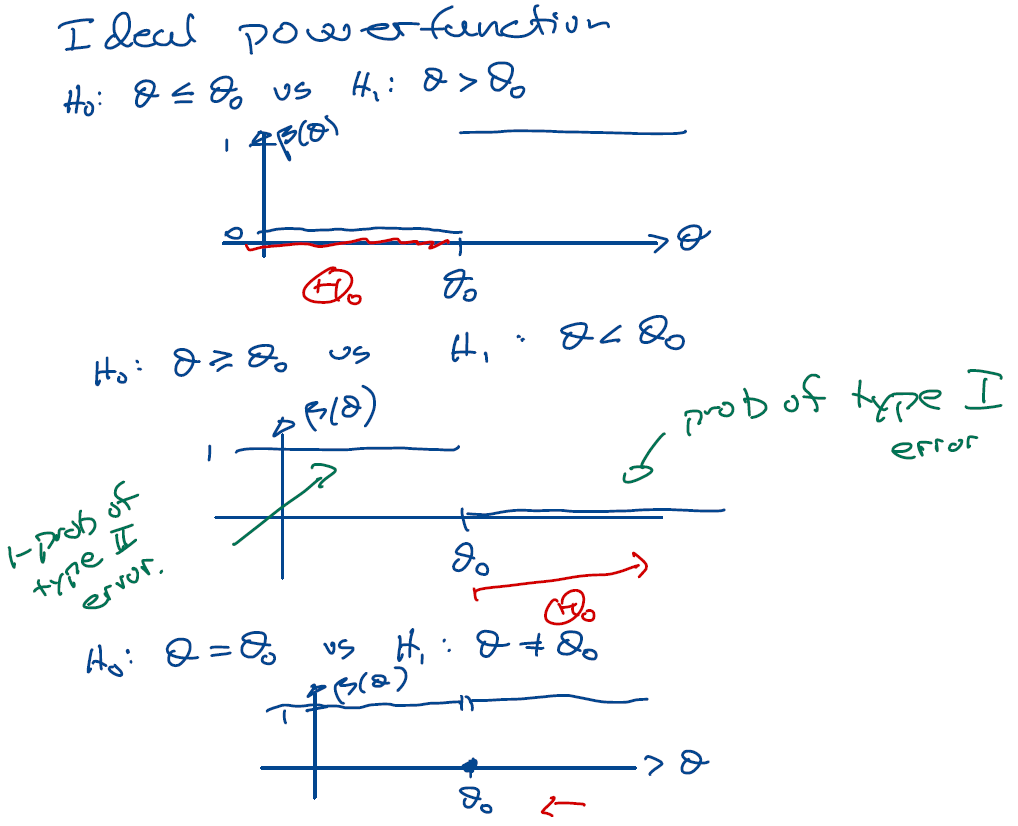

In [1]:
from IPython.display import Image
Image(filename="Images\\Power_Function.png")

## Type I and Type II errors

- Type I error: wrongly deciding to reject $H_0$
    - Rejecting $H_0:\theta\in\Theta_0$ when in fact $\theta\in\Theta_0$
- Type II error: wrongly deciding not to reject $H_0$
    - Don't reject $H_0:\theta\in\Theta_0$ when in fact $\theta\notin\Theta_0$
- Confusion matrix

|                          | Choose $H_0$        | Choose $H_1$ |
|--------------------------|------------------|-----------|
| $H_0$ is true ($\theta \in \Theta_0$)      | no error         | Type I error |
| $H_1$ is true ($\theta \in \Theta_0^c$)       | Type II error    | no error  |

Relation to power function:
- If $\theta\in\Theta_0: \beta(\theta) =$ probability of type I error
- If $\theta\in\Theta_0^c: 1-\beta(\theta)=$ probability of type II error
    - $\beta(\theta)=$ power of test when $\theta\in\Theta_0^c$

### Example: Power function for a Poisson likelihood
- Let $X_1,...,X_n$ be a random sample from $Poisson(\lambda)$
- We want to test the hypotheses
    - $H_0:\lambda\leq 5.3$ vs. $H_1:\lambda>5.3$
- We will reject $H_0$ if $\bar{X}\geq 6$ (test procedure)
- What is the power function for this test?

    Know that sufficient statistic $T=\sum_{i=1}^n X_i\sim Poisson(n\lambda)$

    Reject $H_0$ if $\bar{X}\geq c, c$ is some constant

    $\begin{aligned}
    \beta(\lambda)
    &=P_\lambda(\bar{X}\geq c) \\
    &=P(\frac{1}{n}T\geq c) \\
    &=P(T\geq nc) \\
    &=1-P(T<nc) \\
    &=1-P(T\leq \lceil nc-1 \rceil) \\
    &=1-\sum_{t=0}^{\lceil nc-1 \rceil}\frac{e^{-n\lambda}(n\lambda)^t}{t!}
    \end{aligned}$

    

- When $c=6,\beta(\lambda)=1-\sum_{t=0}^{ 6n-1}\frac{e^{-n\lambda}(n\lambda)^t}{t!}$

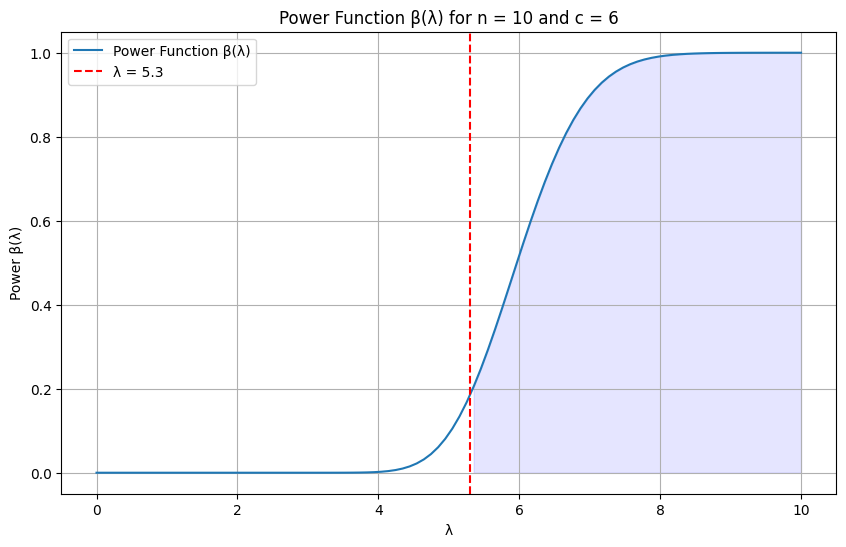

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Function to calculate the power function β(λ)
def BetaFun(lambda_val, c, n):
    """
    Calculate the power function β(λ) = P(∑X_i ≥ n*c | λ)
    where ∑X_i ~ Poisson(n*λ) and c is the critical value for the sample mean.
    
    Parameters:
    - lambda_val (float): The Poisson parameter λ
    - c (float): The critical value for the sample mean (X̄ ≥ c)
    - n (int): Sample size
    
    Returns:
    - float: Power β(λ) = P(∑X_i ≥ n*c)
    """
    # Using the survival function: 1 - CDF(np.ceil(n * c - 1))
    power = 1 - poisson.cdf(np.ceil(n * c - 1), n * lambda_val)
    return power

# Function to plot the power function
def plotBeta(cc, n=10):
    """
    Plot the power function β(λ) for a given critical value c and sample size n.
    
    Parameters:
    - cc (float): The critical value c for the test (X̄ ≥ c)
    - n (int): Sample size (default = 10)
    """
    # Generate a range of λ values from 0 to 10
    lambda_grid = np.linspace(0, 10, 100)
    # Calculate the power function values for each λ
    beta_values = [BetaFun(lam, cc, n) for lam in lambda_grid]
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(lambda_grid, beta_values, label='Power Function β(λ)')
    plt.axvline(x=5.3, color='red', linestyle='--', label='λ = 5.3')
    plt.title(f'Power Function β(λ) for n = {n} and c = {cc}')
    plt.xlabel('λ')
    plt.ylabel('Power β(λ)')
    plt.legend()
    plt.grid(True)
    # Fill the area where λ > 5.3 to indicate power increase
    plt.fill_between(lambda_grid, 0, beta_values, where=(lambda_grid > 5.3), alpha=0.1, color='blue')
    plt.show()
# Call the function to plot the power function with c = 6
if __name__ == "__main__":
    plotBeta(cc=6)

- How does the power function change if instead we reject if $\bar{x}\geq 6.5$ (different $c$)?

    The function shifts to the right, but keeps the same shape.

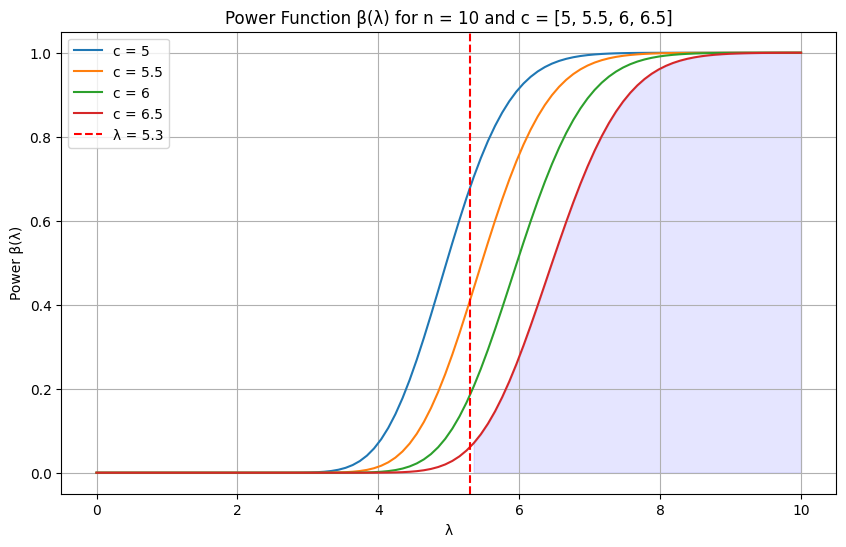

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Function to calculate the power function β(λ)
def BetaFun(lambda_val, c, n):
    """
    Calculate the power function β(λ) = P(∑X_i ≥ n*c | λ)
    where ∑X_i ~ Poisson(n*λ) and c is the critical value for the sample mean.
    
    Parameters:
    - lambda_val (float): The Poisson parameter λ
    - c (float): The critical value for the sample mean (X̄ ≥ c)
    - n (int): Sample size
    
    Returns:
    - float: Power β(λ) = P(∑X_i ≥ n*c)
    """
    # Calculate the threshold as the ceiling of n * c
    threshold = np.ceil(n * c)
    # Compute P(X ≥ threshold) where X ~ Poisson(n * λ)
    # Using the survival function: 1 - CDF(threshold - 1)
    power = 1 - poisson.cdf(int(threshold - 1), n * lambda_val)
    return power

# Function to plot the power function for multiple critical values
def plotBeta(cc, n=10):
    """
    Plot the power function β(λ) for multiple critical values c and a fixed sample size n.
    
    Parameters:
    - cc (list): List of critical values c for the test (X̄ ≥ c)
    - n (int): Sample size (default = 10)
    """
    # Generate a range of λ values from 0 to 10
    lambda_grid = np.linspace(0, 10, 100)
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    
    # Plot power function for each critical value
    for c in cc:
        beta_values = [BetaFun(lam, c, n) for lam in lambda_grid]
        plt.plot(lambda_grid, beta_values, label=f'c = {c}')
    
    # Add vertical line at λ = 5.3
    plt.axvline(x=5.3, color='red', linestyle='--', label='λ = 5.3')
    plt.title(f'Power Function β(λ) for n = {n} and c = {cc}')
    plt.xlabel('λ')
    plt.ylabel('Power β(λ)')
    plt.legend()
    plt.grid(True)
    # Fill the area where λ > 5.3 for the last curve (c = 6.5) to indicate power increase
    plt.fill_between(lambda_grid, 0, beta_values, where=(lambda_grid > 5.3), alpha=0.1, color='blue')
    plt.show()
# Call the function to plot the power function with multiple c values
if __name__ == "__main__":
    plotBeta(cc=[5, 5.5, 6, 6.5])

- How does the power function change if sample size $n$ is increased?

    The function becomes steeper and closer to the ideal form of $\beta(\lambda)=0$ in $\Theta_0$ and $\beta(\lambda)=1$ in $\Theta_0^c$

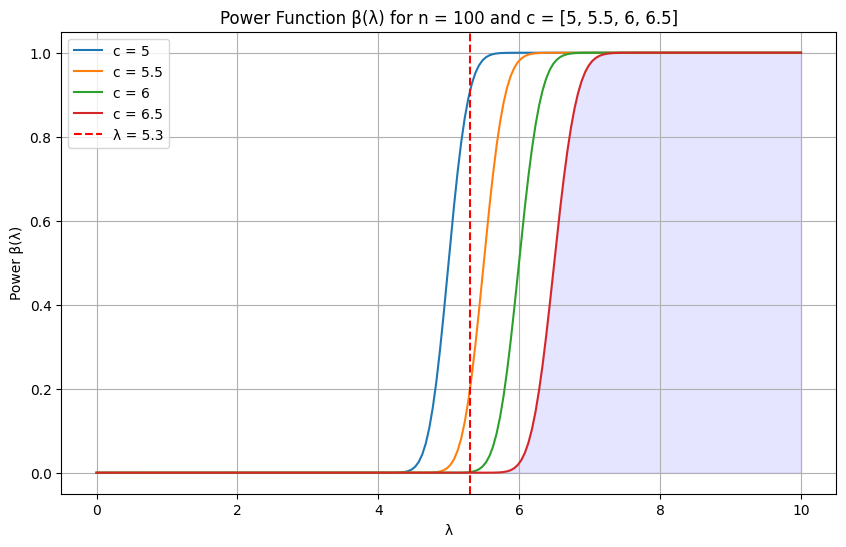

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Function to calculate the power function β(λ)
def BetaFun(lambda_val, c, n):
    """
    Calculate the power function β(λ) = P(∑X_i ≥ n*c | λ)
    where ∑X_i ~ Poisson(n*λ) and c is the critical value for the sample mean.
    
    Parameters:
    - lambda_val (float): The Poisson parameter λ
    - c (float): The critical value for the sample mean (X̄ ≥ c)
    - n (int): Sample size
    
    Returns:
    - float: Power β(λ) = P(∑X_i ≥ n*c)
    """
    # Calculate the threshold as the ceiling of n * c
    threshold = np.ceil(n * c)
    # Compute P(X ≥ threshold) where X ~ Poisson(n * λ)
    # Using the survival function: 1 - CDF(threshold - 1)
    power = 1 - poisson.cdf(int(threshold - 1), n * lambda_val)
    return power

# Function to plot the power function for multiple critical values
def plotBeta(cc, n=100):
    """
    Plot the power function β(λ) for multiple critical values c and a fixed sample size n.
    
    Parameters:
    - cc (list): List of critical values c for the test (X̄ ≥ c)
    - n (int): Sample size (default = 100)
    """
    # Generate a range of λ values from 0 to 10
    lambda_grid = np.linspace(0, 10, 200)  # Increased points for smoother curve with n=100
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    
    # Plot power function for each critical value
    for c in cc:
        beta_values = [BetaFun(lam, c, n) for lam in lambda_grid]
        plt.plot(lambda_grid, beta_values, label=f'c = {c}')
    
    # Add vertical line at λ = 5.3
    plt.axvline(x=5.3, color='red', linestyle='--', label='λ = 5.3')
    plt.title(f'Power Function β(λ) for n = {n} and c = {cc}')
    plt.xlabel('λ')
    plt.ylabel('Power β(λ)')
    plt.legend()
    plt.grid(True)
    # Fill the area where λ > 5.3 for the last curve (c = 6.5) to indicate power increase
    plt.fill_between(lambda_grid, 0, beta_values, where=(lambda_grid > 5.3), alpha=0.1, color='blue')
    plt.show()

# Call the function to plot the power function with multiple c values and n=100
if __name__ == "__main__":
    plotBeta(cc=[5, 5.5, 6, 6.5], n=100)

### Example: After-School
- The Chapel Hill & Carrboro City Schools (CHCCS) operate After-School programs in all the Elementary schools in the district
- Each month they send invoices to families that have children enrolled in these programs for both the monthly fee and any extra charges, such as care during teacher workdays (eg. election day)
- Customers are expected to use their own envelopes and stamps to return their payments
- Currently, the time it takes to pay bills has a mean of 24 days and a standard deviation of 6 days
- Suppose the chief financial officer (CFO) believes that including a stamped self-addressed envelope would decrease the amount of time it takes to pay the bills
- She calculates that the improved cash flow from a 2-day decrease in the payment period would pay for the costs for envelopes and stamps. Further decrease would generate profit
- To test this she randomly selects 220 customers and includes a stamped self-addressed envelope with their invoice
- She assumes that the time to pay a bill follows the normal distribution $N(\mu,\sigma^2)$, where $\sigma^2$ is known

Using the data from her experiment, how can she conclude whether this plan will be profitable?

### Power function for after-school
- We have $X_1,...,X_n$ i.i.d. $N(\mu,\sigma^2)$ and we are interested in testing

    $H_0:\mu\geq 22$ vs. $H_1:\mu<22$

    We assume that $\sigma^2$ is known, $\sigma^2=6^2$
- Consider the LRT procedure:
    - Reject $H_0$ if

        $\frac{\bar{X}-\mu_0}{\sigma/\sqrt{n}}\leq-\sqrt{-2\log c}\equiv c^{*}$

        that is if

        $\frac{\bar{X}-22}{6/\sqrt{220}}\leq c^*$
- What is the power function for this test?

    Know that $\bar{X}\sim N(\mu,\sigma^2/n)$.

    Reject $H_0$ iff $\frac{\bar{X}-\mu_0}{\sigma/\sqrt{n}}\leq c^*$

    $\begin{aligned}
    \beta(\mu)
    &=P_u(\frac{\bar{X}-\mu_0}{\sigma/\sqrt{n}}\leq c^*)\\
    &=P_u(\frac{\bar{X}-\mu+\mu-\mu_0}{\sigma/\sqrt{n}}\leq c^*)\\
    &=P(\frac{\bar{X}-\mu}{\sigma/\sqrt{n}}\leq c^*-\frac{\mu-\mu_0}{\sigma/\sqrt{n}})\quad(\text{Standard Normal})\\
    &=\Phi(c^*-\frac{\mu}{\sigma/\sqrt{n}}+\frac{\mu_0}{\sigma/\sqrt{n}})
    \end{aligned}$

    - It depends on unknown parameter $\mu$, since $c^*,\mu_0,\sigma,n$ are constant.
    - Set $A=c^*-\frac{\mu}{\sigma/\sqrt{n}}+\frac{\mu_0}{\sigma/\sqrt{n}}$.
        - When $\mu$ increases, $A$ decreases, and $\Phi(A)$ decreases, because Cdf is monotone increasing.
        - Therefore, $\beta(\mu)$ is a monotone decreasing function of $\mu$.

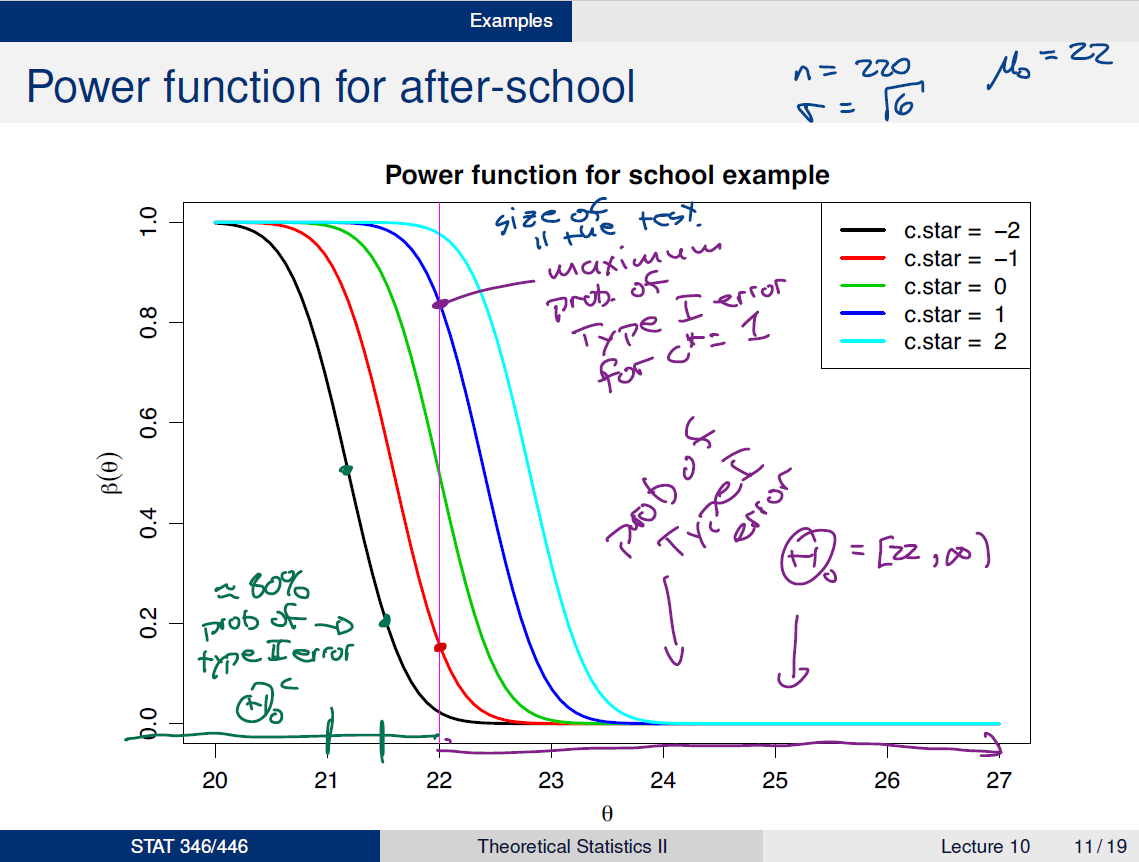

In [5]:
from IPython.display import Image
Image(filename="Images\\Power_Function_after-School1.png")

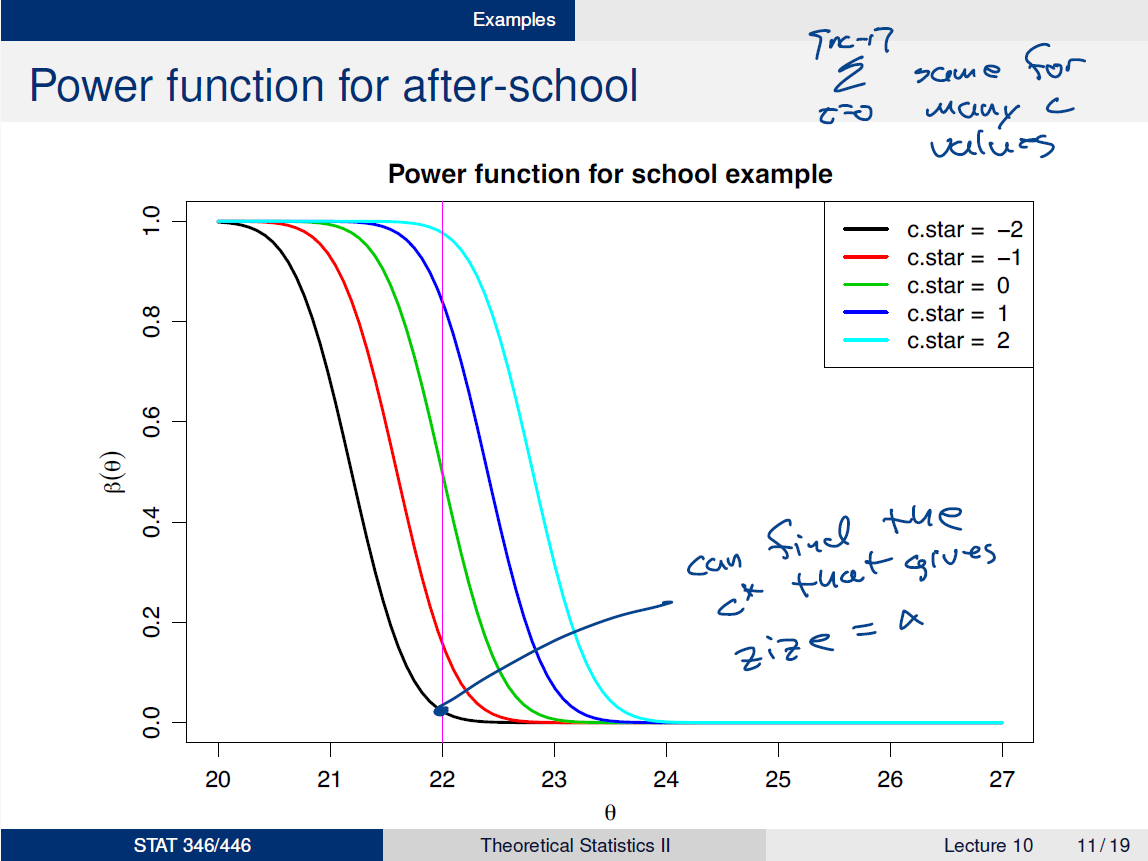

In [6]:
from IPython.display import Image
Image(filename="Images\\Power_Function_after-School2.png")

## Level and size of tests

Refer to power function **only on** $\Theta_0$

**Definition**: Level and size

A test with power function $\beta(\theta)$
- is a **size $\alpha$** test if $\sup_{\theta\in\Theta_0}\beta(\theta)=\alpha$
- is a **level $\alpha$** test if $\sup_{\theta\in\Theta_0}\beta(\theta)\leq\alpha$

where $\alpha\in[0,1]$
- Size of a test $\leq$ level of a test
- Sometimes on distinction made between size and level
- Choose test procedure that have a certain size (e.g. 0.1, 0.05, 0.01, 0.001)
    - Not unique, have a class $C$ of level $\alpha$ tests
- For discrete distributions, exact size not always attainable
    - Randomzied tests


- Want $\beta(\theta)$ to be small for $\theta\in\Theta_0$ and large for $\theta\in\Theta_0^c$
- Generally there is a trade-off between these probabilities
- A common approach: choose a number $\alpha$ and pick a procedure (e.g. $c^*$) such that

    $\beta(\theta)\leq\alpha$ for $\theta\in\Theta_0$

    That is, we put an upper bound on the probability of type I error
- The test is then a level $\alpha$ test or we say that the test has **significance level $\alpha$**

Example: Find the $c^*$ value that makes the schools-example test a level 0.05 test.
- Size:

    $\begin{aligned}
    \alpha
    &=\sup_{\mu\in[\mu_0,\infty)}\beta(c^*-\frac{\mu}{\sigma/\sqrt{n}}+\frac{\mu_0}{\sigma/\sqrt{n}})\\
    &=\Phi(c^*-\frac{\mu_0}{\sigma/\sqrt{n}}+\frac{\mu_0}{\sigma/\sqrt{n}})\\
    &=\Phi(c^*)=0.05
    \end{aligned}$

    $\Phi^{-1}(0.05)=c^*\Rightarrow c^*=-Z_\alpha=-Z_{0.05}=-1.64$

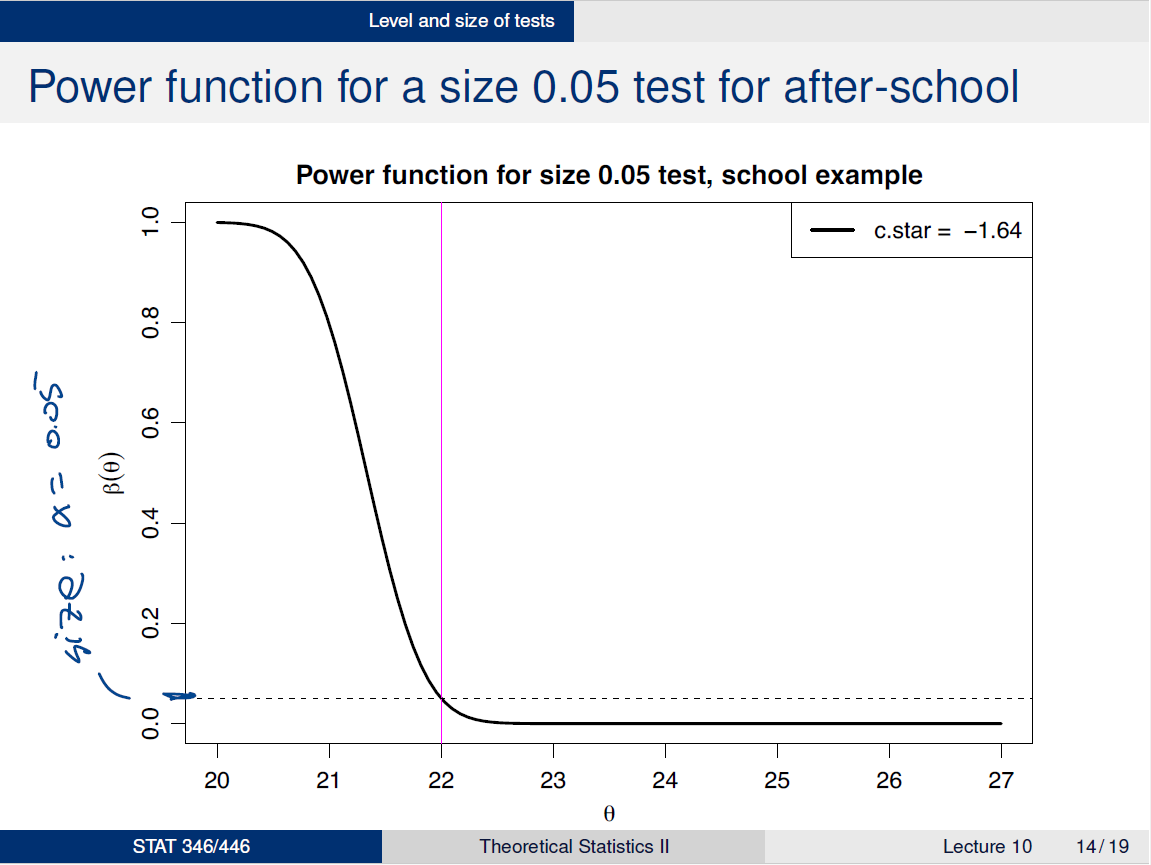

In [7]:
from IPython.display import Image
Image(filename="Images\\alpha.png")

## Upper quantile notation
- A standard notation for upper quantiles.
- $z_\alpha$ is the value where

    $P(Z>z_\alpha)=\alpha$ where $Z\sim N(0,1)$
- $t_{n,\alpha}$ is the value where

    $P(T>t_{n,\alpha})=\alpha$ where $T\sim t_n$
- $\chi_{n,\alpha}^2$ is the value where

    $P(X>\chi_{n,\alpha}^2)=\alpha$ where $X\sim\chi_n^2$


## Size / Level for the Poisson Example
- The set-up
    - $X_1,...,X_n$ i.i.d. $Poisson(\lambda)$
    - $H_0:\lambda\leq 5.3$ versus $H_1:\lambda>5.3$
    - Reject $H_0$ iff $\bar{X}\geq c$ for some $c$
- Power function:

    $\begin{aligned}
    \beta(\lambda) & =P_\lambda(T\geq nc)\quad\mathrm{~where~}T=\sum_{i=1}^nX_i \\
    & =1-\sum_{t=0}^{\lceil nc-1\rceil}\frac{e^{n\lambda}(n\lambda)^{t}}{t!}
    \end{aligned}$

    - Want to find the $c$ (or $c^*=\lceil nc-1\rceil$) such that $\alpha=\sup_{\lambda\in(-\infty,5.3]\beta(\lambda)}=\beta(5.3)$
    - A bit complicated function of $\lambda$ but we saw in the RMarkdown file that it is a monotone increasing function of $\lambda$ - Need to justify this ($\frac{d}{d\lambda}\beta(\lambda)>0$)!
- Since the power function $\beta(\lambda)$ is monotone increasing function of $\lambda$:

    $\sup_{\lambda\leq5.3}\beta(\lambda)=\beta(5.3)=1-\sum_{t=0}^{\lceil nc-1\rceil}\frac{e^{5.3n}(5.3n)^{t}}{t!}$

    Can’t "solve for $c$" so we try a few values - see RMarkdown file

Justification for our statement that the power function 

$\beta(\lambda)=1-\sum_{t=0}^{\lceil nc-1\rceil}\frac{e^{n\lambda}(n\lambda)^{t}}{t!}$

$*$: Based on the fact that $\beta(\lambda)$ is a monotone increasing function of $\lambda$
- One way: Take arbitrary $\lambda_1$ and $\lambda_2$ and assume that $\lambda_1<\lambda_2$. Then show that $\beta(\lambda_1)\leq\beta(\lambda_2)$
- Another way: show that

    $\frac{d}{d\lambda}\beta(\lambda)>0$ for all $\lambda>0$

## Unbiased tests

**Definition:**

A test with power function $\beta(\theta)$ is called unbiased if

$\beta(\theta)\leq\beta(\theta')\quad\forall\theta\in\Theta_0,\theta'\in\Theta_0^c$
- For any $\theta$ in $\Theta_0$ we want the probability of rejecting $H_0$ to be smaller than for any $\theta\in\Theta_0^c$

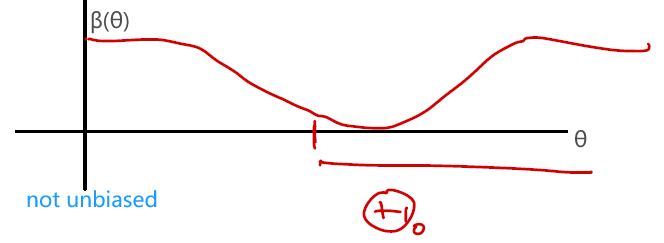

In [8]:
from IPython.display import Image
Image(filename="Images\\biased_test.png")